# Problem

The objective is to find connected components in an undirected graph consisting of business relationships from https://firststop.sos.nd.gov/search/business.

The intuitive way to approach this is to have owners and companys be nodes so we can capture indirect relationships components. 

```
        comapny2
         /      \
        /        \       company3
    company1      \      /
                   \    /
    /               owner2

owner 1

```

We could then replace the company nodes and reconnect the edges and that would take O(n^3) as n diff nodes with n-1 choose 2 * n-2 choose 2..O(n * n*2).  The new edges to add. This can happens over and over so this is not a good idea. How about we summarize by removing the company nodes and just summarizing them by using the path in the connected components DFS algorithm. This works.

The issue is we have implicit assumptions in the data.

The problem space seems as follows

There can be 0 people 0 company owners and 1 agent
There can be 0 people 1 company owners and 0 agent
There can be 1 or more people 0 company owners and 0 agent

Note how there is each are mutually exclusive. This means we can ignore company relationships.



```
        comapny2    company4
         /           |
        /            |   
    company1      company3
                        \
    /      \    /        \
owner 1    owner2       owner2

```

To Prove that we can ignore the company nodes

Suppose for sake of contradition that the company nodes add a new path between node u and v. A company node would either have to join two company nodes
or join the two nodes u and v. The first is a contradiction and the second does not add a new path as it already exists in the included edges.


Concretly,

The nodes V, can take the values {"Owner","Owner Name","Registered Agent","Commercial Registered Agent"}

The edges E, are pairs of these nodes presented as company information.

We can find the conncected compoents in O(V) + O(E) using DFS.



# Deisgn

Since there are many unseen examples I assumed and wrote the code to account for 0 to many owners.

Record linkage is needed but was skipped as that is beyond the scope of the problem.

Exception handling and logging should be well defined. It seems https://firststop.sos.nd.gov/search/business is actually returning incorrect query results that start with X. There needs be validaiton, imagine if the query retuend 1 million companies!

We use jsonlines to store the data which allows the data to loaded line by line.

Throtling was implemented to be nice. The Autothrotling algorithm is interesting.

The formula given latency/desired units = target delay. This translates to latency per unit is the target delay. The new delay is an average of old delay and target delay.
What the algorithm is trying to do is create balance between the LHS and the RHS.
```
Suppose we 2sec/1unit = 2sec delay.

delay is ==========================
latency is ------------------------


0       1       2       3       4       5       6       7       8       9       10

---------------------------------------------------------------------------------------------------------------------------------------------

s1d============s1---------------f1
                s2d============s2---------------f2
                                s3d============s3---------------f3
                                                s4d============s4---------------f4
s1d is when the request is enqueued.
s1 is when the request is sent
f1 is when the response is received.

The throughput = 3/(8-2) = 1 every 2 seconds


Suppose latency increases

---------------------------------------------------------------------------------------------------------------------------------------------

s1d============s1---------------------------------------------------------------f1
                s2d============s2-----------------------------------------------f2
                                s3d============s3-------------------------------f3
                                                s4d============s4---------------f4

                                                                                s5d==============================================s5-----------------------------------------------f5
```

The throughput at 9 seconds is 0 but at 10 it becomes 4/10 = 1 every 2.5 seconds. Performance degraded as latency increased unexpectedly. This also caused congestion that could degrade performance. In the usual case delay is chasing after the latency. I decided to be super nice and the min delay is almost always more than the 2 second latency seen in the browser inspector.


Graph with 12 nodes and 6 edges
6 connected components


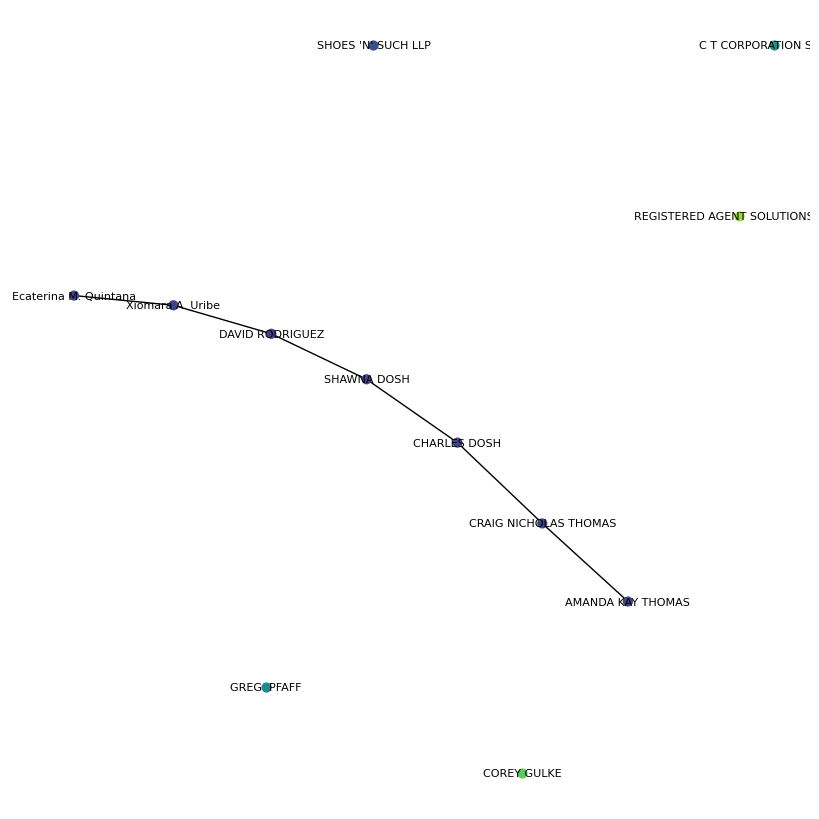

In [2]:
import random
from plot_connected_components import create_graph,plot_graph

#Here is a small example of a large connected component
random.seed(32687)
G = create_graph("example.jsonl")
plot_graph(G,"example.png")

Graph with 8 nodes and 3 edges
6 connected components


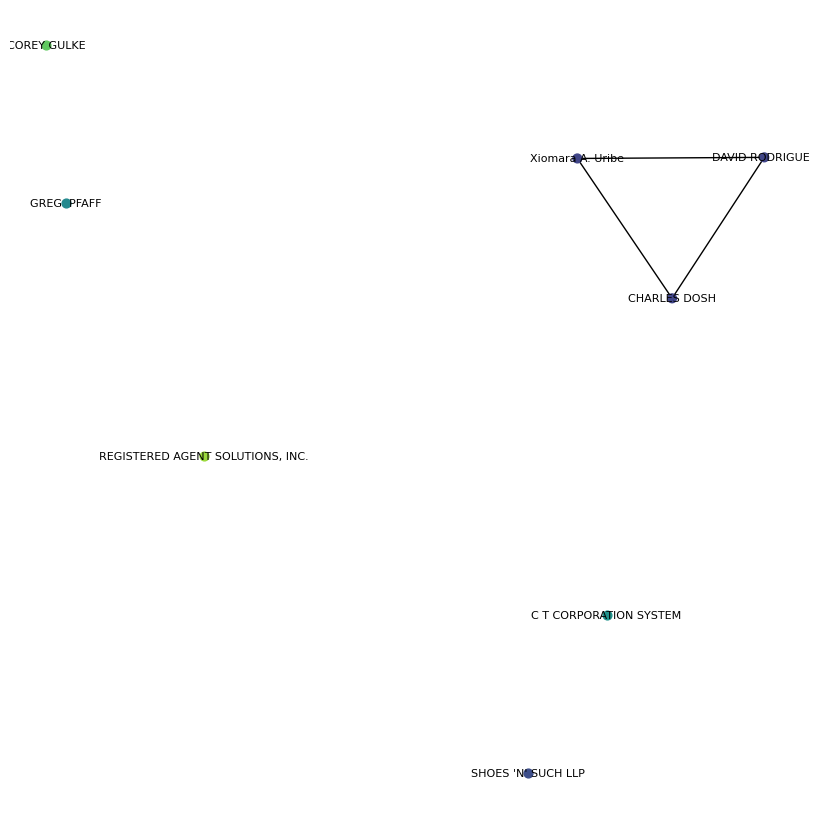

In [3]:
random.seed(32687)
# Here is an example of a company with 3 owners.
G = create_graph("test_triple.jsonl")
plot_graph(G,"test_triple.png")

Graph with 0 nodes and 0 edges
0 connected components


<Figure size 800x800 with 0 Axes>